### Задание к уроку 3

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

1. Задание (в программе)
Нарисуйте график функции:

y(x) = k·cos(x – a) + b

для некоторых (2-3 различных) значений параметров k, a, b

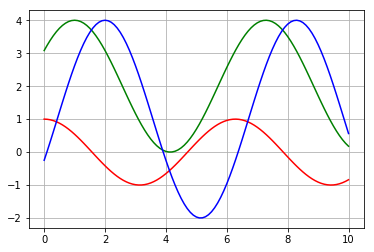

In [2]:
x = np.linspace(0, 10, 101)
k1, a1, b1 = 1, 0, 0
k2, a2, b2 = 2, 1, 2
k3, a3, b3 = 3, 2, 1
plt.plot(x, k1*np.cos(x - a1) + b1, c='r')
plt.plot(x, k2*np.cos(x - a2) + b2, c='g')
plt.plot(x, k3*np.cos(x - a3) + b3, c='b')
plt.grid()

3. Задание (в программе)

1) Напишите код, который будет переводить полярные координаты в декартовы.



In [3]:
p, v = 2, 2*np.pi

x = p*np.cos(v)
y = p*np.sin(v)
(x, y)

(2.0, -4.898587196589413e-16)

2) Напишите код, который будет рисовать график окружности в полярных
координатах.

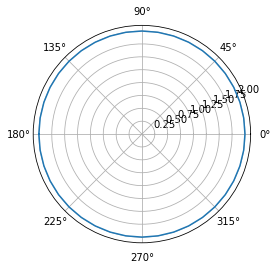

In [4]:
# окружность
R = 2
r = [R for _ in range(41)]
v = np.linspace(-np.pi, np.pi, 41)

plt.polar(v, r)

4. Задание (в программе)

1) Решите систему уравнений:

y = x^2 – 1

exp(x) + x*(1 – y) = 1



2.618145573085479 5.854686241867045
4.200105841155175 16.640889076905832
-1.5818353528958982 1.5022030836712916


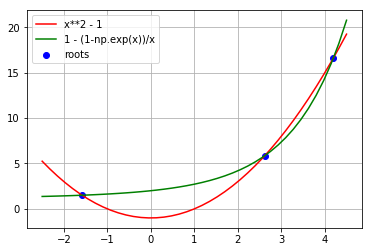

In [5]:
# для наглядности нарисуем графики
from scipy.optimize import fsolve

x0 = np.linspace(-2.5, 4.5, 41)
y1 = x0**2 - 1
y2 = 1 - (1-np.exp(x0))/x0

def equations(p):
    x, y = p
    return (x**2 - 1 - y, np.exp(x) + x*(1-y) - 1)


x_solv = []
y_solv = []
x, y = fsolve(equations, (2.75, 8))
x_solv.append(x)
y_solv.append(y)
print(x, y)
x, y = fsolve(equations, (4.25, 18))
x_solv.append(x)
y_solv.append(y)
print(x, y)
x, y = fsolve(equations, (-2, 2))
x_solv.append(x)
y_solv.append(y)
print(x, y)

plt.scatter(x_solv, y_solv, color='blue', label='roots')
plt.plot(x0, y1, c='r', label='x**2 - 1')
plt.plot(x0, y2, c='g', label='1 - (1-np.exp(x))/x')
plt.legend()
plt.grid()

2) Решите систему уравнений и неравенств:

y = x^2 – 1

exp(x) + x*(1 – y) > 1

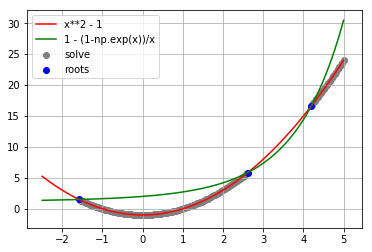

In [6]:
x = np.linspace(-2.5, 5, 201)
y1 = x**2 - 1
y2 = 1 - (1-np.exp(x))/x
plt.plot(x, y1, c='r', label='x**2 - 1')
plt.plot(x, y2, c='g', label='1 - (1-np.exp(x))/x')
y0 = 21
#plt.fill_between(x, y2, y0, facecolor='yellow')        
x_solv2 = []
y_solv2 = []
for i in x:
    if (i**2 - 1) < 1 - (1-np.exp(i))/i:
        y_solv2.append(i**2 - 1)
        x_solv2.append(i)
plt.scatter(x_solv2, y_solv2, c='gray', label='solve')
plt.scatter(x_solv, y_solv, color='blue', label='roots')
plt.legend()
plt.grid()

### Задания к уроку 4

Задание 1. 
Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [7]:
for i_ in range(10):
    input(f'испытание {i_+1}')
    x = np.random.uniform(0, 184)
    print(int(x//5))

испытание 1
23
испытание 2
32
испытание 3
10
испытание 4
1
испытание 5
35
испытание 6
0
испытание 7
33
испытание 8
15
испытание 9
19
испытание 10
3


 Задание 2.

1) Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки.


In [8]:
n = 1000
x = np.random.uniform(0, 184, n)
x = x // 5
k30 = len(x[x==30])
k21 = len(x[x==21])
P30 = k30/n
P21 = k21/n
print(P30 + P21, (k30+k21)/n)

0.060000000000000005 0.06


2) Сгенерируйте десять выборок случайных чисел х0, …, х9.и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

Text(0.5, 1.0, 'Histogram')

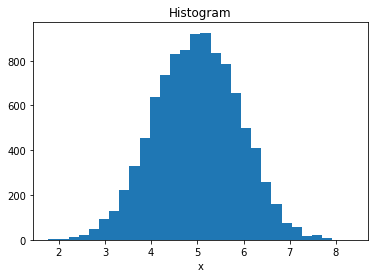

In [9]:
x = np.array([np.random.rand(10000) for _ in range(10)])
x1 = x.sum(axis=0)
plt.hist(x1, 30)
plt.xlabel('x')
plt.title('Histogram')

Задание 3.

1) Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.


In [10]:
import itertools
n_test = 4
k_success = 2
n = 10000
x = np.array([np.random.randint(0, 2, n) for _ in range(n_test)])
x = x.sum(axis=0)
k = len(x[x == k_success])
print(k, n, k/n)   


3785 10000 0.3785


In [11]:
nstr = ''.join(map(str, range(n_test)))
Cnk = len(list(itertools.combinations(nstr, k_success)))
p_nk = Cnk / 2**n_test
print(p_nk)

0.375


2) Повторите расчеты, взяв другие значения n и k.

In [12]:
n_test = 6
k_success = 4
n = 10000
x = np.array([np.random.randint(0, 2, n) for _ in range(n_test)])
x = x.sum(axis=0)
k = len(x[x == k_success])
print(k, n, k/n)  

2361 10000 0.2361


In [13]:
nstr = ''.join(map(str, range(n_test)))
Cnk = len(list(itertools.combinations(nstr, k_success)))
p_nk = Cnk / 2**n_test
print(p_nk)

0.234375


Задание 4. 
Повторите расчеты, взяв другие значения n и k.

In [14]:
n = 6
k = 4
nstr = ''.join(map(str, range(n)))
print(nstr)

012345


In [15]:
# перестановки k = n
n_P = len(list(itertools.permutations(nstr, n)))
print(f'всего перестановок: {n_P}')
for p in itertools.permutations(nstr, n):
    print(''.join(str(x) for x in p))


всего перестановок: 720
012345
012354
012435
012453
012534
012543
013245
013254
013425
013452
013524
013542
014235
014253
014325
014352
014523
014532
015234
015243
015324
015342
015423
015432
021345
021354
021435
021453
021534
021543
023145
023154
023415
023451
023514
023541
024135
024153
024315
024351
024513
024531
025134
025143
025314
025341
025413
025431
031245
031254
031425
031452
031524
031542
032145
032154
032415
032451
032514
032541
034125
034152
034215
034251
034512
034521
035124
035142
035214
035241
035412
035421
041235
041253
041325
041352
041523
041532
042135
042153
042315
042351
042513
042531
043125
043152
043215
043251
043512
043521
045123
045132
045213
045231
045312
045321
051234
051243
051324
051342
051423
051432
052134
052143
052314
052341
052413
052431
053124
053142
053214
053241
053412
053421
054123
054132
054213
054231
054312
054321
102345
102354
102435
102453
102534
102543
103245
103254
103425
103452
103524
103542
104235
104253
104325
104352
104523
104532
105234
105

In [16]:
# размещения из n по k
n_A = len(list(itertools.permutations(nstr, k)))
print(f'всего размещений из {n} по {k}: {n_A}')
for p in itertools.permutations(nstr, k):
    print(''.join(str(x) for x in p))

всего размещений из 6 по 4: 360
0123
0124
0125
0132
0134
0135
0142
0143
0145
0152
0153
0154
0213
0214
0215
0231
0234
0235
0241
0243
0245
0251
0253
0254
0312
0314
0315
0321
0324
0325
0341
0342
0345
0351
0352
0354
0412
0413
0415
0421
0423
0425
0431
0432
0435
0451
0452
0453
0512
0513
0514
0521
0523
0524
0531
0532
0534
0541
0542
0543
1023
1024
1025
1032
1034
1035
1042
1043
1045
1052
1053
1054
1203
1204
1205
1230
1234
1235
1240
1243
1245
1250
1253
1254
1302
1304
1305
1320
1324
1325
1340
1342
1345
1350
1352
1354
1402
1403
1405
1420
1423
1425
1430
1432
1435
1450
1452
1453
1502
1503
1504
1520
1523
1524
1530
1532
1534
1540
1542
1543
2013
2014
2015
2031
2034
2035
2041
2043
2045
2051
2053
2054
2103
2104
2105
2130
2134
2135
2140
2143
2145
2150
2153
2154
2301
2304
2305
2310
2314
2315
2340
2341
2345
2350
2351
2354
2401
2403
2405
2410
2413
2415
2430
2431
2435
2450
2451
2453
2501
2503
2504
2510
2513
2514
2530
2531
2534
2540
2541
2543
3012
3014
3015
3021
3024
3025
3041
3042
3045
3051
3052
3054
3102
310

In [17]:
# сочетания из n по k
n_С = len(list(itertools.combinations(nstr, k)))
print(f'всего сочетаний из {n} по {k}: {n_С}')
for p in itertools.combinations(nstr, k):
    print(''.join(str(x) for x in p))

всего сочетаний из 6 по 4: 15
0123
0124
0125
0134
0135
0145
0234
0235
0245
0345
1234
1235
1245
1345
2345


Задание 5. 

Дополните код расчетом коэффициента корреляции x и y по формуле 


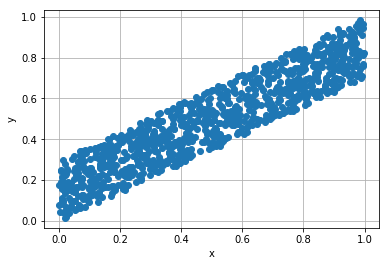

[[1.         0.92276402]
 [0.92276402 1.        ]]


In [18]:
n = 1000
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()
c = np.corrcoef(x, y) 
print(c)

In [19]:
x_mean = x.mean()
y_mean = y.mean()
# коэффициент корреляции по формуле
R = sum((x - x_mean)*(y - y_mean)) / np.sqrt(sum((x - x_mean)**2)* sum((y - y_mean)**2))
print(R)

0.9227640164109125


1. Классическая задача про иглу Бюффона:

Иголку длиной b=10 см наудачу бросают на разлинованную бумагу, где расстояние между соседними линиями тоже a=10 см.

С какой вероятностью упавшая иголка пересечет линию бумаги?


In [20]:
a = 10 # расстояние между линиями
b = 10 # длина иглы
n = 10000
alfa = np.random.uniform(0, np.pi/2, n) # угол наклона иглы к прямой - генерируем случайно
h = np.random.uniform(0, a/2, n) # расстояние от центра иглы до прямой - генерируем случайно
k = len(h[h <= b/2 * np.sin(alfa)]) # считаем число пересечений по геометрическому условию
print(f'число пересечений {k}, всего испытаний {n}, вероятность пересечения {k/n}')
print(f'вероятность по формуле 2*b/a/np.pi {2*b/a/np.pi}')

число пересечений 6364, всего испытаний 10000, вероятность пересечения 0.6364
вероятность по формуле 2*b/a/np.pi 0.6366197723675814


Сделать расчеты, взяв другие (неравные значения a и b)

In [21]:
a = 12 # расстояние между линиями
b = 4 # длина иглы
n = 10000
alfa = np.random.uniform(0, np.pi/2, n)
h = np.random.uniform(0, a/2, n)
k = len(h[h <= b/2 * np.sin(alfa)])
print(f'число пересечений {k}, всего испытаний {n}, вероятность пересечения {k/n}') 
print(f'вероятность по формуле 2*b/a/np.pi {2*b/a/np.pi}')

число пересечений 2099, всего испытаний 10000, вероятность пересечения 0.2099
вероятность по формуле 2*b/a/np.pi 0.21220659078919377


при уменьшении длины иглы вероятность пересечения уменьшается в той же пропорции